In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

# Load the Dataset
df = pd.read_csv('creditcard_2023.csv')

In [4]:
# Investigate Dataset - checking for missing values and duplicated values
df.isna().sum()
df.duplicated().any()

False

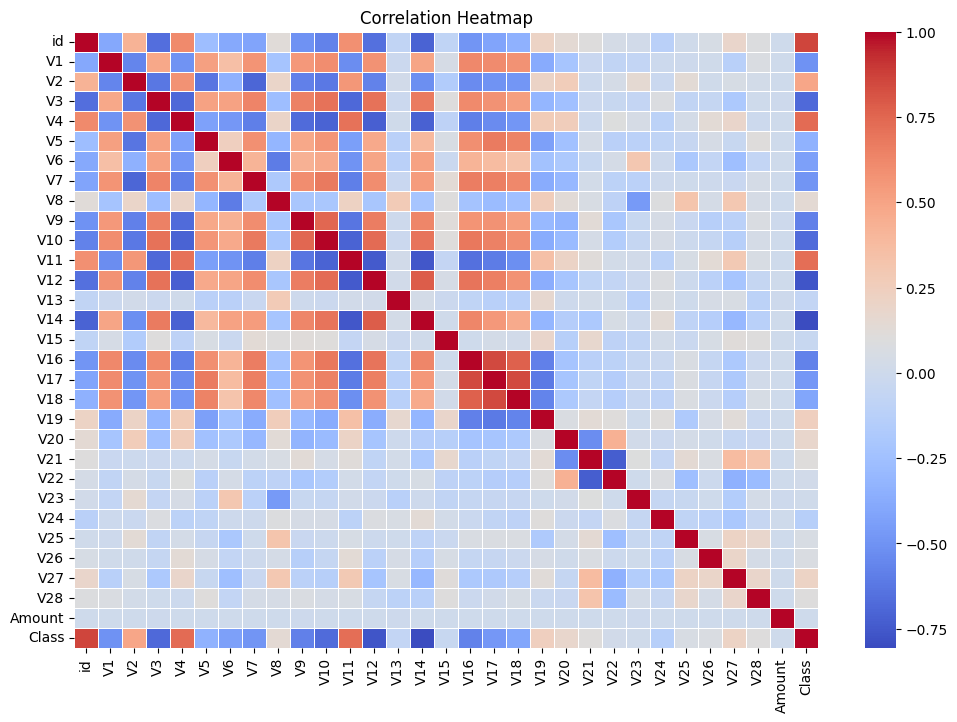

In [5]:
# Create Correlation Heatmap
correlation_matrix = df.corr()
plot.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plot.title('Correlation Heatmap')
plot.show()

In [6]:
# Skew Data
df.skew() 
# V1, V10 and V23 is negatively skewed to a great extent

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

Text(0.5, 1.0, 'Feature Skew')

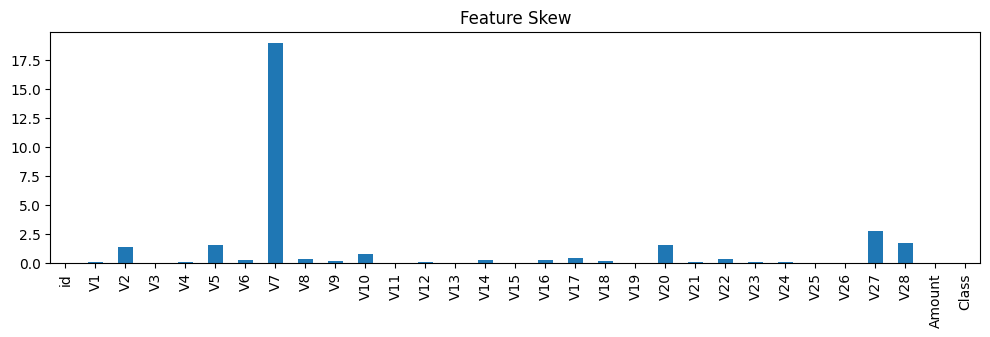

In [7]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import title

figure(figsize=(12,3))
features = df.columns.values.tolist()
skew = np.abs(df.skew())
feature_series = pd.Series(data=skew, index=features)
feature_series.plot.bar()
title('Feature Skew')

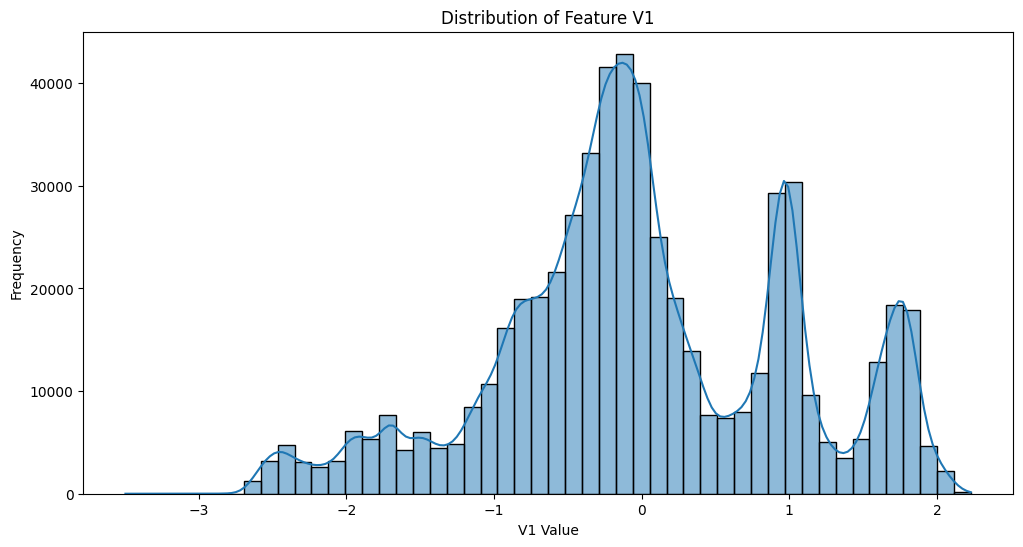

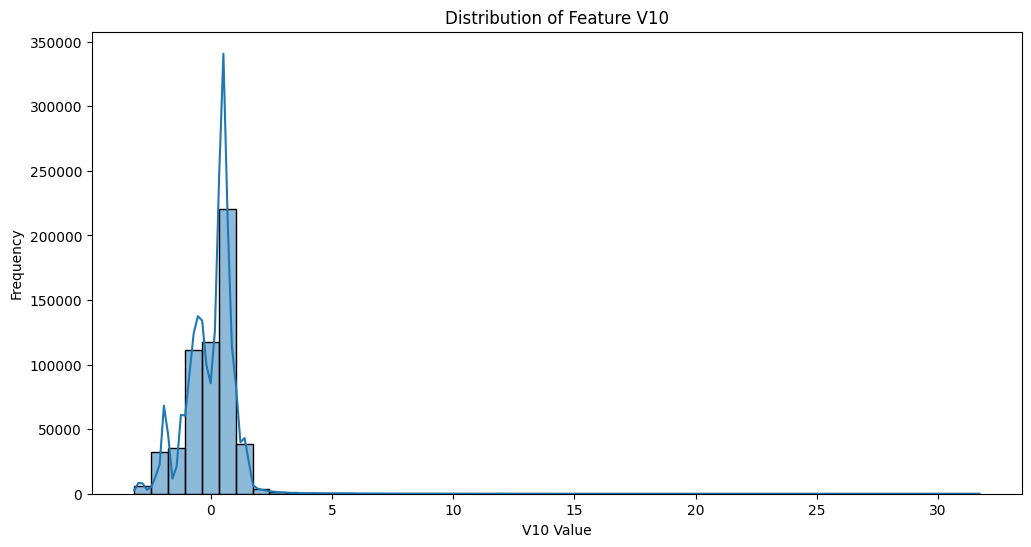

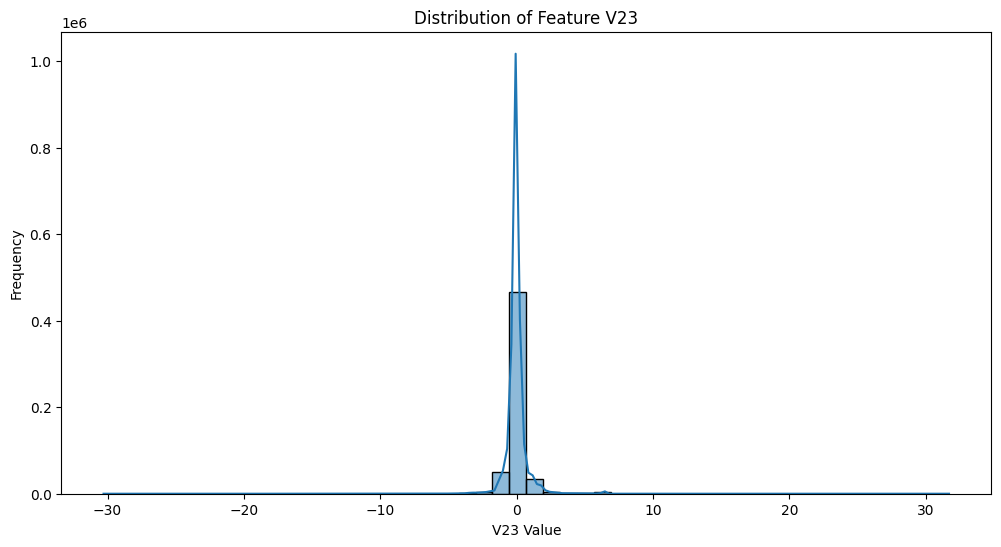

In [8]:
# Create histogram for feature distribution of the negatively skewed values
plot.figure(figsize = (12, 6))
sns.histplot(df['V1'], bins = 50, kde = True)
plot.title('Distribution of Feature V1')
plot.xlabel('V1 Value')
plot.ylabel('Frequency')
plot.show()

plot.figure(figsize = (12, 6))
sns.histplot(df['V10'], bins = 50, kde = True)
plot.title('Distribution of Feature V10')
plot.xlabel('V10 Value')
plot.ylabel('Frequency')
plot.show()

plot.figure(figsize = (12, 6))
sns.histplot(df['V23'], bins = 50, kde = True)
plot.title('Distribution of Feature V23')
plot.xlabel('V23 Value')
plot.ylabel('Frequency')
plot.show()

In [9]:
features = df.drop(['id', 'Class'], axis=1)
labels = df['Class']

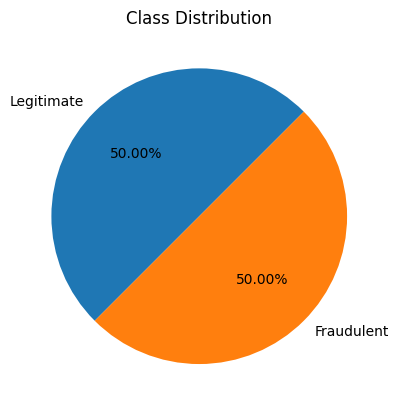

In [10]:
# Class Distribution

unique, counts = np.unique(labels, return_counts=True)

legend = ['Legitimate', 'Fraudulent']

plot.pie(counts, autopct='%3.2f%%', labels=legend, startangle=45)
plot.title('Class Distribution')
plot.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

In [16]:
def train_random_forest(data_features, data_labels, title, max_tree_depth=None):

    # Description: This funtion takes in feature and label data to train a random forest classifier
    # it prints out a classification report and confusion matrix to summarize the results of the 
    # classifier training

    # Input:
    # data_features - features to train on
    # lables - corresponding classes to train on
    # title - string with description of data
    # max_tree_depth - max_depth of estimator decision tress. Default is max_depth=None

    # Output:
    # rf - random forest classifier trained on the input data
    # train_accuracy - training accuracy of the classifier
    # accuracy - testing accuracy of the calssifier

    X_train, X_test, y_train, y_test = train_test_split(data_features, data_labels, test_size=0.2)

    rf = RandomForestClassifier(class_weight='balanced', max_depth=max_tree_depth)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    y_pred_train = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    print(title)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", accuracy)

    print(classification_report(y_test, y_pred))

    confusion = confusion_matrix(y_test, y_pred)
    confusion = confusion / np.sum(confusion, axis=1)

    plot.figure(figsize=(5,4))
    sns.heatmap(confusion, annot=True, cmap=plot.cm.Blues)
    class_names = ['Legitimate', 'Fraudulent']
    tick_marks = np.arange(len(class_names)) + 0.5
    plot.xticks(tick_marks, class_names)
    plot.yticks(tick_marks, class_names)
    plot.xlabel('Predicted')
    plot.ylabel('True')
    plot.title(['Confusion Matrix: ', title], wrap=True)
    plot.show()

    return rf, train_accuracy, accuracy, X_test

Random Forest on all features
Train Accuracy: 1.0
Test Accuracy: 0.9998681040395336
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57047
           1       1.00      1.00      1.00     56679

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



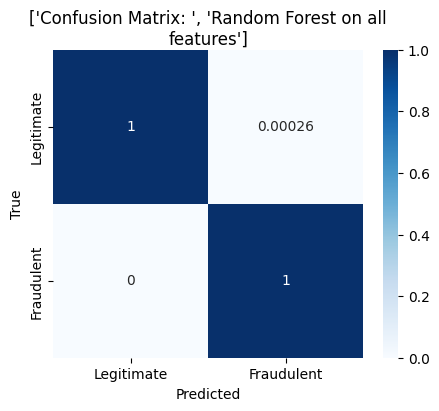

Random Forest on High Correlation (V1-V22) features
Train Accuracy: 1.0
Test Accuracy: 0.9998681040395336
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56587
           1       1.00      1.00      1.00     57139

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



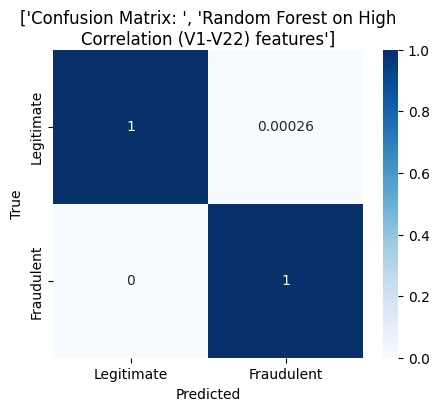

In [17]:
rf_all, train_acc_all, test_acc_all, X_test_all = train_random_forest(features, labels, "Random Forest on all features")

hi_corr_features = features.iloc[:, 0:21]
rf_hi_corr, train_acc_hi_corr, test_acc_hi_corr, X_test_hi_corr = train_random_forest(hi_corr_features, labels, "Random Forest on High Correlation (V1-V22) features")

In [115]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_pred_train = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Random Forest on all features")
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Random Forest on all features
Train Accuracy: 1.0
Validation Accuracy: 0.9998681040395336
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56529
           1       1.00      1.00      1.00     57197

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [116]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features.iloc[:, 0:21], labels, test_size=0.2)

rf2 = RandomForestClassifier(class_weight='balanced')
rf2.fit(X_train2, y_train2)

y_pred2 = rf2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)

y_pred_train2 = rf2.predict(X_train2)
train_accuracy2 = accuracy_score(y_train2, y_pred_train2)

print("Random Forest on High Correlation (V1-V22) features")
print("Train Accuracy:", train_accuracy2)
print("Validation Accuracy:", accuracy2)

print(classification_report(y_test2, y_pred2))

Random Forest on High Correlation (V1-V22) features
Train Accuracy: 1.0
Validation Accuracy: 0.9998944832316269
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       1.00      1.00      1.00     56861

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [117]:
#Look at cumulative explained variance to select number of PCA components (We chose > 0.85)
from sklearn.decomposition import PCA

n_features = 21
for i in range(2, n_features):
  pca = PCA(n_components=i)
  pca.fit(features.iloc[:, 0:21])
  print(i, ': ', np.sum(pca.explained_variance_ratio_))

2 :  0.5515749428006289
3 :  0.6231341494808297
4 :  0.688134524129917
5 :  0.7360314394268026
6 :  0.7727996842534661
7 :  0.8049434826252665
8 :  0.8291604290832585
9 :  0.8509413765451362
10 :  0.870865284578632
11 :  0.8899439656629277
12 :  0.9055681709953463
13 :  0.9195045120271812
14 :  0.9329460534709788
15 :  0.945092875506553
16 :  0.9568498911683821
17 :  0.967347429605479
18 :  0.9768002216856297
19 :  0.9859213615414328
20 :  0.9947349089755183


In [145]:
pca = PCA(n_components=9)
pca.fit(features.iloc[:, 0:21])
pca_features = pca.transform(features.iloc[:, 0:n_features])

# print('PCA Components: \n', pca.components_)
# print('PCA Features: \n', pca_features)


In [ ]:
rf_pca, train_acc_pca, test_acc_pca, X_test_pca = train_random_forest(pca_features, labels, "Random Forest on PCA features (PC1-PC9)")


In [119]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_features, labels, test_size=0.2)

rf_pca = RandomForestClassifier(class_weight='balanced')
rf_pca.fit(X_train_pca, y_train_pca)


y_pred_pca = rf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

y_pred_train_pca = rf_pca.predict(X_train_pca)
train_accuracy_pca = accuracy_score(y_train_pca, y_pred_train_pca)

print("Random Forest on PCA features (PC1-PC9)")
print("Train Accuracy:", train_accuracy_pca)
print("Validation Accuracy:", accuracy_pca)

print(classification_report(y_test_pca, y_pred_pca))

Random Forest on PCA features (PC1-PC9)
Train Accuracy: 1.0
Validation Accuracy: 0.99943724390201
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56568
           1       1.00      1.00      1.00     57158

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Text(0.5, 1.0, 'Feature Importance RF PCA')

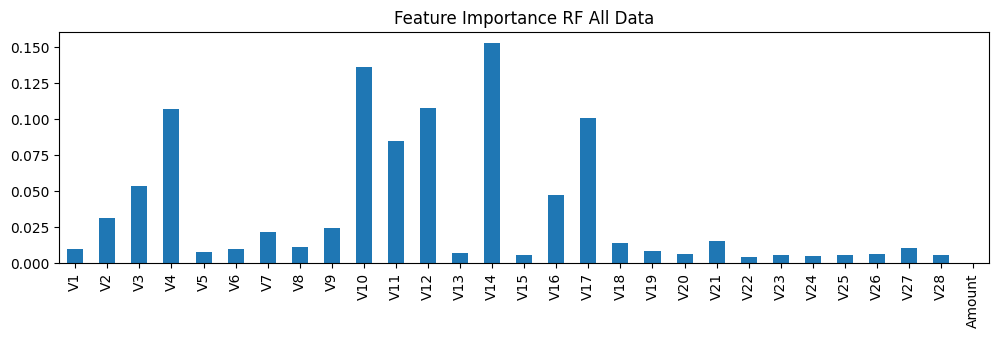

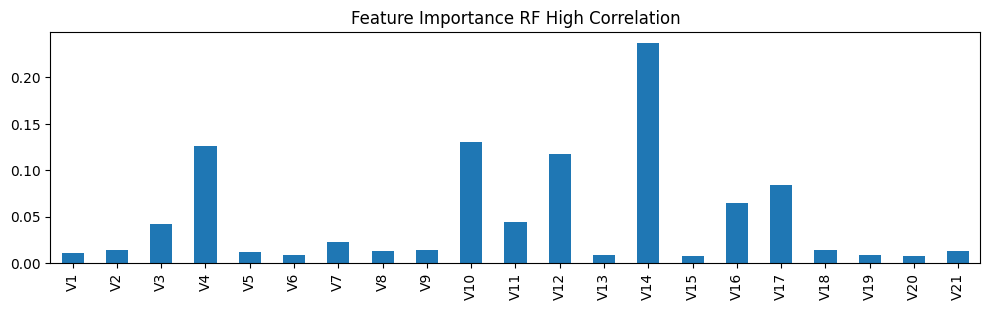

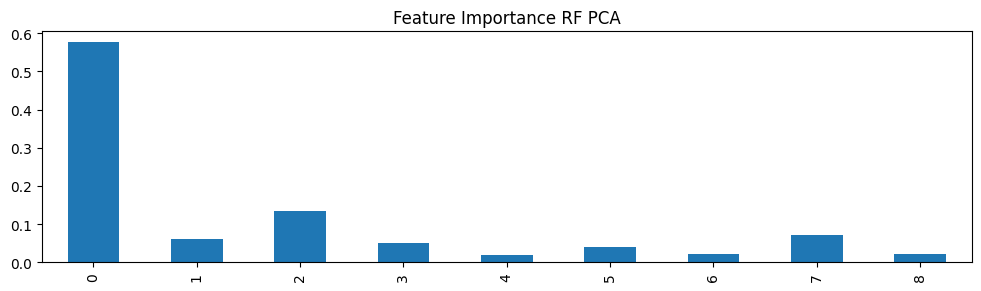

In [124]:
figure(figsize=(12,3))
feat = X_test_all.columns.values.tolist()
importance = rf_all.feature_importances_.tolist()
feature_series = pd.Series(data=importance, index=feat)
feature_series.plot.bar()
title('Feature Importance RF All Data')

figure(figsize=(12,3))
feat = X_test_hi_corr.columns.values.tolist()
importance = rf_hi_corr.feature_importances_.tolist()
feature_series = pd.Series(data=importance, index=feat)
feature_series.plot.bar()
title('Feature Importance RF High Correlation')

figure(figsize=(12,3))
feat = pd.DataFrame(X_test_pca).columns.values.tolist()
importance = rf_pca.feature_importances_.tolist()
feature_series = pd.Series(data=importance, index=feat)
feature_series.plot.bar()
title('Feature Importance RF PCA')

In [ ]:
rf_all_5d, train_acc_all_5d, test_acc_all_5d, X_test_acc_all_5d = train_random_forest(features, labels, "Random Forest on all features (max_depth=5)", max_tree_depth=5)

In [ ]:
important_features_6 = df[['V4', 'V11', 'V10', 'V12', 'V14', 'V17']]
rf_6_imp_5d, train_acc_6_imp_5d, test_acc_6_imp_5d, X_test_acc_6_imp_5d = train_random_forest(important_features_6, labels, "Random Forest on 6 most important features (max_depth=5)", max_tree_depth=5)

important_features_9 = df[['V4', 'V10', 'V12', 'V14', 'V17', 'V11', 'V3', 'V16', 'V2']]
rf_9_imp_5d, train_acc_9_imp_5d, test_acc_9_imp_5d, X_test_acc_9_imp_5d = train_random_forest(important_features_9, labels, "Random Forest on 6 most important features (max_depth=5)", max_tree_depth=5)


In [ ]:
important_features = df[['V4', 'V10', 'V12', 'V14', 'V17']]
rf_5_imp, train_acc_5_imp, test_acc_5_imp, X_test_acc_5_imp = train_random_forest(important_features, labels, "Random Forest on 5 most important features", max_tree_depth=None)

rf_5_imp_4d, train_acc_5_imp_4d, test_acc_5_imp_4d, X_test_acc_5_imp_4d = train_random_forest(important_features, labels, "Random Forest on 5 most important features (max_depth=4)", max_tree_depth=4)
rf_5_imp_5d, train_acc_5_imp_5d, test_acc_5_imp_5d, X_test_acc_5_imp_5d = train_random_forest(important_features, labels, "Random Forest on 5 most important features (max_depth=5)", max_tree_depth=5)
rf_5_imp_6d, train_acc_5_imp_6d, test_acc_5_imp_6d, X_test_acc_5_imp_6d = train_random_forest(important_features, labels, "Random Forest on 5 most important features (max_depth=6)", max_tree_depth=6)
rf_5_imp_7d, train_acc_5_imp_7d, test_acc_5_imp_7d, X_test_acc_5_imp_7d = train_random_forest(important_features, labels, "Random Forest on 5 most important features (max_depth=7)", max_tree_depth=7)


In [129]:
important_features = df[['V4', 'V10', 'V12', 'V14', 'V17']]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(important_features, labels, test_size=0.2)

rf_imp = RandomForestClassifier(class_weight='balanced')
rf_imp.fit(X_train_imp, y_train_imp)


y_pred_imp = rf_imp.predict(X_test_imp)
accuracy_imp = accuracy_score(y_test_imp, y_pred_imp)

y_pred_train_imp = rf_imp.predict(X_train_imp)
train_accuracy_imp2 = accuracy_score(y_train_imp, y_pred_train_imp)

print("Random Forest on all 5 most important features")
print("Train Accuracy:", train_accuracy_imp2)
print("Validation Accuracy:", accuracy_imp)

print(classification_report(y_test_imp, y_pred_imp))

Random Forest on all 5 most important features
Train Accuracy: 1.0
Validation Accuracy: 0.9980127675289732
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56812
           1       1.00      1.00      1.00     56914

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [133]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

rf_3 = RandomForestClassifier(class_weight='balanced', max_depth=5) # to see progress use verbose=2
rf_3.fit(X_train, y_train)

y_pred3 = rf_3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

y_pred_train3 = rf_3.predict(X_train)
train_accuracy3 = accuracy_score(y_train, y_pred_train3)

print("Random Forest on all features (max_depth=5)")
print("Train Accuracy:", train_accuracy3)
print("Validation Accuracy:", accuracy3)

print(classification_report(y_test, y_pred3))

Random Forest on all features (max_depth=5)
Train Accuracy: 0.9547355046339447
Validation Accuracy: 0.9539067583490143
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56724
           1       1.00      0.91      0.95     57002

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95    113726
weighted avg       0.96      0.95      0.95    113726



In [131]:
important_features = df[['V4', 'V10', 'V12', 'V14', 'V17']]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(important_features, labels, test_size=0.2)

rf_imp = RandomForestClassifier(class_weight='balanced', max_depth=5)
rf_imp.fit(X_train_imp, y_train_imp)


y_pred_imp = rf_imp.predict(X_test_imp)
accuracy_imp = accuracy_score(y_test_imp, y_pred_imp)

y_pred_train_imp = rf_imp.predict(X_train_imp)
train_accuracy_imp2 = accuracy_score(y_train_imp, y_pred_train_imp)

print("Random Forest on all 5 most important features (max_depth=5)")
print("Train Accuracy:", train_accuracy_imp2)
print("Validation Accuracy:", accuracy_imp)

print(classification_report(y_test_imp, y_pred_imp))

Random Forest on all 5 most important features (max_depth=5)
Train Accuracy: 0.9564303677259378
Validation Accuracy: 0.9551817526335227
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     57165
           1       0.99      0.92      0.95     56561

    accuracy                           0.96    113726
   macro avg       0.96      0.95      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [136]:
important_features = df[['V4', 'V11', 'V10', 'V12', 'V14', 'V17']]

X_train_imp_more, X_test_imp_more, y_train_imp_more, y_test_imp_more = train_test_split(important_features, labels, test_size=0.2)

rf_imp = RandomForestClassifier(class_weight='balanced', max_depth=5)
rf_imp.fit(X_train_imp_more, y_train_imp_more)


y_pred_imp_more = rf_imp.predict(X_test_imp_more)
accuracy_imp_more = accuracy_score(y_test_imp_more, y_pred_imp_more)

y_pred_train_imp_more = rf_imp.predict(X_train_imp_more)
train_accuracy_imp_more2 = accuracy_score(y_train_imp_more, y_pred_train_imp_more)

print("Random Forest on all 6 most important features (max_depth=5)")
print("Train Accuracy:", train_accuracy_imp_more2)
print("Validation Accuracy:", accuracy_imp_more)

print(classification_report(y_test_imp_more, y_pred_imp_more))

Random Forest on all 6 most important features (max_depth=5)
Train Accuracy: 0.9560588607706242
Validation Accuracy: 0.9562281272532227
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56670
           1       0.99      0.92      0.95     57056

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [137]:
important_features = df[['V4', 'V10', 'V12', 'V14', 'V17', 'V11', 'V3', 'V16', 'V2']]

X_train_imp_more, X_test_imp_more, y_train_imp_more, y_test_imp_more = train_test_split(important_features, labels, test_size=0.2)

rf_imp = RandomForestClassifier(class_weight='balanced', max_depth=5)
rf_imp.fit(X_train_imp_more, y_train_imp_more)


y_pred_imp_more = rf_imp.predict(X_test_imp_more)
accuracy_imp_more = accuracy_score(y_test_imp_more, y_pred_imp_more)

y_pred_train_imp_more = rf_imp.predict(X_train_imp_more)
train_accuracy_imp_more2 = accuracy_score(y_train_imp_more, y_pred_train_imp_more)

print("Random Forest on all 9 most important features (max_depth=5)")
print("Train Accuracy:", train_accuracy_imp_more2)
print("Validation Accuracy:", accuracy_imp_more)

print(classification_report(y_test_imp_more, y_pred_imp_more))

Random Forest on all 9 most important features (max_depth=5)
Train Accuracy: 0.9574569579515678
Validation Accuracy: 0.9568788139915235
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56828
           1       0.99      0.92      0.96     56898

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [138]:
important_features = df[['V4', 'V10', 'V12', 'V14', 'V17']]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(important_features, labels, test_size=0.2)

rf_imp = RandomForestClassifier(class_weight='balanced', max_depth=4)
rf_imp.fit(X_train_imp, y_train_imp)


y_pred_imp = rf_imp.predict(X_test_imp)
accuracy_imp = accuracy_score(y_test_imp, y_pred_imp)

y_pred_train_imp = rf_imp.predict(X_train_imp)
train_accuracy_imp2 = accuracy_score(y_train_imp, y_pred_train_imp)

print("Random Forest on all 5 most important features (max_depth=4)")
print("Train Accuracy:", train_accuracy_imp2)
print("Validation Accuracy:", accuracy_imp)

print(classification_report(y_test_imp, y_pred_imp))

Random Forest on all 5 most important features (max_depth=4)
Train Accuracy: 0.9538210259747112
Validation Accuracy: 0.9540826196296361
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56812
           1       0.99      0.92      0.95     56914

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95    113726
weighted avg       0.96      0.95      0.95    113726



In [139]:
important_features = df[['V4', 'V10', 'V12', 'V14', 'V17']]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(important_features, labels, test_size=0.2)

rf_imp = RandomForestClassifier(class_weight='balanced', max_depth=6)
rf_imp.fit(X_train_imp, y_train_imp)


y_pred_imp = rf_imp.predict(X_test_imp)
accuracy_imp = accuracy_score(y_test_imp, y_pred_imp)

y_pred_train_imp = rf_imp.predict(X_train_imp)
train_accuracy_imp2 = accuracy_score(y_train_imp, y_pred_train_imp)

print("Random Forest on all 5 most important features (max_depth=6)")
print("Train Accuracy:", train_accuracy_imp2)
print("Validation Accuracy:", accuracy_imp)

print(classification_report(y_test_imp, y_pred_imp))

Random Forest on all 5 most important features (max_depth=6)
Train Accuracy: 0.9605784956826056
Validation Accuracy: 0.9605103494363646
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56862
           1       0.99      0.93      0.96     56864

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [19]:
important_features = df[['V4', 'V10', 'V12', 'V14', 'V17']]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(important_features, labels, test_size=0.2)

rf_imp = RandomForestClassifier(class_weight='balanced', max_depth=7)
rf_imp.fit(X_train_imp, y_train_imp)


y_pred_imp = rf_imp.predict(X_test_imp)
accuracy_imp = accuracy_score(y_test_imp, y_pred_imp)

y_pred_train_imp = rf_imp.predict(X_train_imp)
train_accuracy_imp2 = accuracy_score(y_train_imp, y_pred_train_imp)

print("Random Forest on all 5 most important features (max_depth=7)")
print("Train Accuracy:", train_accuracy_imp2)
print("Validation Accuracy:", accuracy_imp)

print(classification_report(y_test_imp, y_pred_imp))

Random Forest on all 5 most important features (max_depth=7)
Train Accuracy: 0.9645045987724883
Validation Accuracy: 0.9652937762692788
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     57091
           1       0.99      0.94      0.96     56635

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



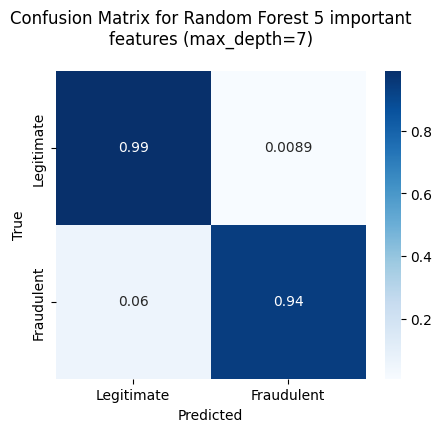

In [20]:
confusion = confusion_matrix(y_test_imp, y_pred_imp)
confusion = confusion / np.sum(confusion, axis=1)

plot.figure(figsize=(5,4))
sns.heatmap(confusion, annot=True, cmap=plot.cm.Blues)
class_names = ['Legitimate', 'Fraudulent']
tick_marks = np.arange(len(class_names)) + 0.5
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
plot.xlabel('Predicted')
plot.ylabel('True')
plot.title('Confusion Matrix for Random Forest 5 important features (max_depth=7)\n', wrap=True)
plot.show()

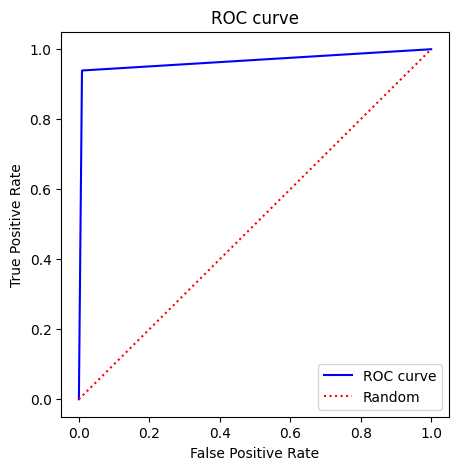

ROC AUC score:  0.9651895257875807


In [29]:
# fpr = false pos rates, tpr = true pos rates
fpr, tpr, thresh = roc_curve(y_test_imp, y_pred_imp)
score = roc_auc_score(y_test_imp, y_pred_imp)

plot.figure(figsize=(5,5))
plot.plot(fpr, tpr, color="blue", label="ROC curve")
# comparison line
plot.plot([0,1], [0,1], color="red", linestyle=':', label="Random")

plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC curve')

plot.legend()
plot.show()

print("ROC AUC score: ", score)
